In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splprep, splev

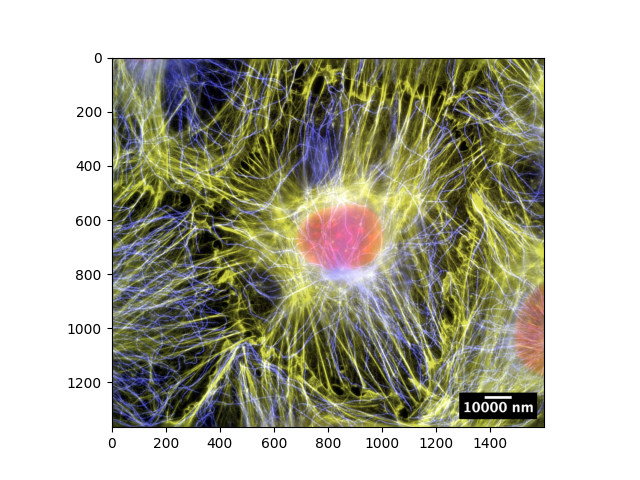

In [24]:
image_path = "fibroblast.png"

image = plt.imread(image_path)

%matplotlib widget

# display a graph for the image, image is layered on top
# click points in order to include them in measurement
fig, ax = plt.subplots()
ax.imshow(image)

raw_points = []

# define a function to click on the image to label the points
# unfortunately not a good way to do this computationally,
# will have to be by hand for now

# credit: https://www.tutorialspoint.com/matplotlib/matplotlib_click_events.htm

def onclick(event):
   global ix, iy
   ix, iy = event.xdata, event.ydata
   print(f'Clicked at x = {ix}, y = {iy}')

   global raw_points
   raw_points.append((ix, iy))

   ax.plot(ix, iy, 'bo', markersize=4)
   plt.draw() 

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [18]:
# calculate euclidean length between opints
def calculate_length(points):
    length = 0
    
    for i in range(1, len(points)):
        length += np.sqrt((points[i][0] - points[i-1][0])**2 + (points[i][1] - points[i-1][1])**2)
    return length

In [19]:

points = np.array(raw_points)

# extract x and y from processed x and y
x = points[:, 0]
y = points[:, 1]

# use spline function to interpolate curve between points
tck, u = splprep([x,y], s=0)
new_points = splev(np.linspace(0, 1, 1000), tck)

# space out parameter values to allow for smoother splineFigure 6

u_fine = np.linspace(0, 1, 1000)
x_new, y_new = splev(u_fine, tck)

smooth_curve_length = calculate_length(np.array(new_points).T)
# convert this to nm using scale bar - 1 pixels = 1000nm 

nanometre_length = smooth_curve_length * 100

print(f"Length of the smooth curve: {smooth_curve_length} pixels, {nanometre_length} nm")


Length of the smooth curve: 112.98501392498876 pixels, 11298.501392498876 nm


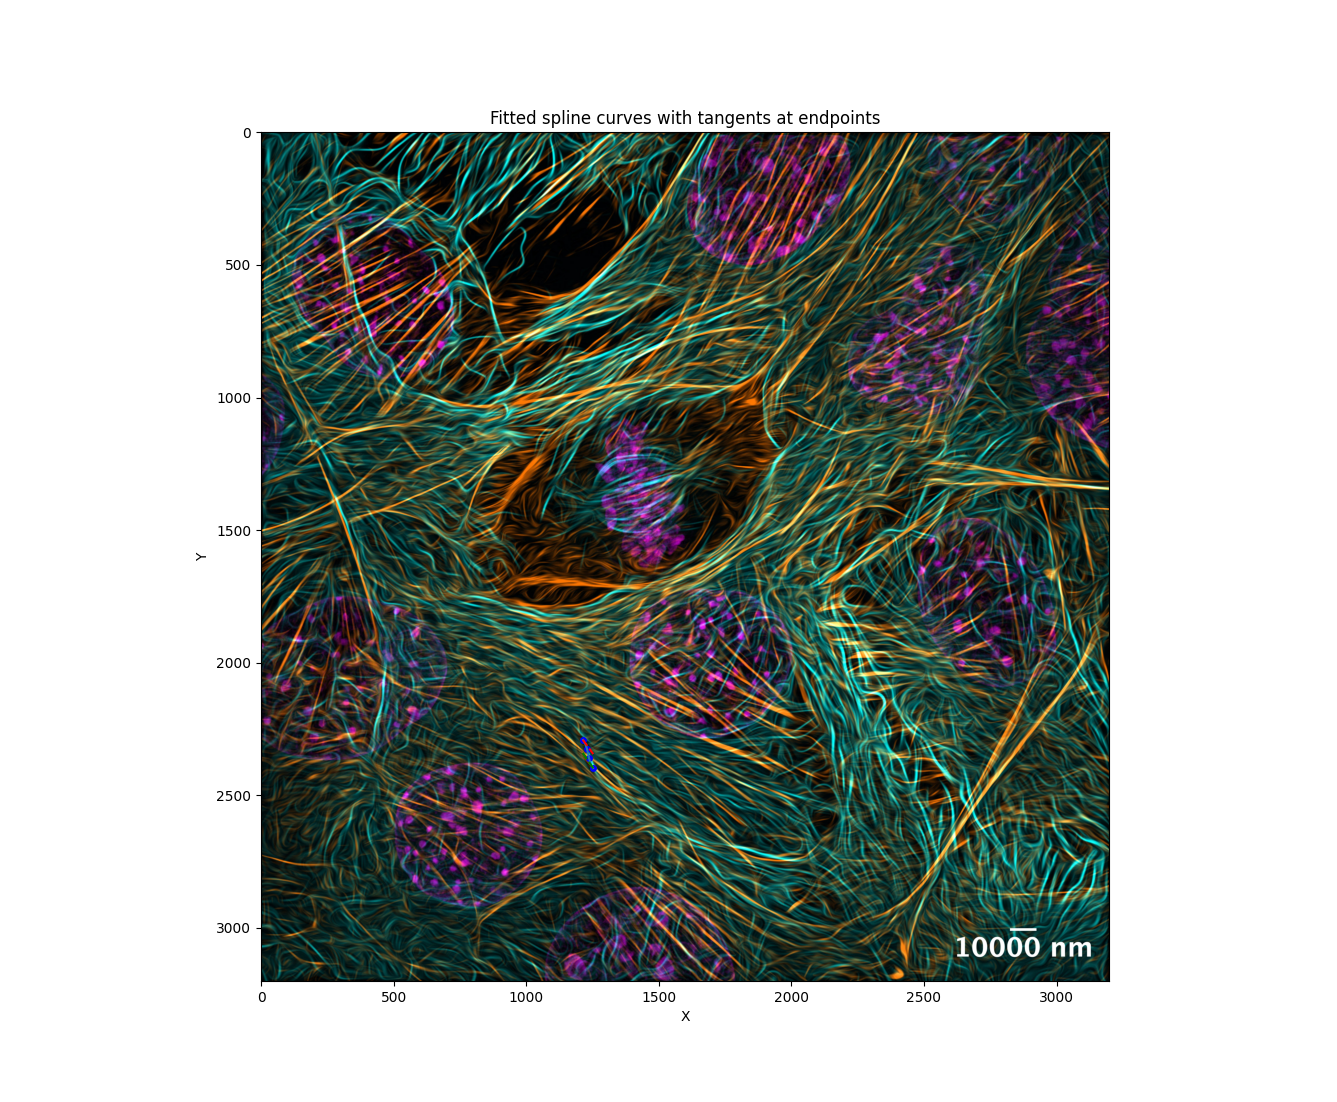

In [20]:
# first derivative to get slope
dx_new, dy_new = splev(u_fine, tck, der=1)

# pick the first and last points
# note that this assumes the user picked the first point in the array first
# and the last point in the array last
x_start, y_start = x_new[0], y_new[0]
x_end, y_end = x_new[-1], y_new[-1]

# find derivatives at these points
dx_start, dy_start = dx_new[0], dy_new[0]
dx_end, dy_end = dx_new[-1], dy_new[-1]

# calculate slopes of tangent line
slope_start = dy_start / dx_start
slope_end = dy_end / dx_end

# get tangent line
def tangent_line(x, x0, y0, slope):
    return slope * (x - x0) + y0

# use these to make a tangent line that's by default 100 points long
x_vals = np.linspace(x_new[0] - 1, x_new[-1] + 1, 100)

plt.plot(x_new, y_new, label="Fitted spline")
plt.plot(x_vals, tangent_line(x_vals, x_start, y_start, slope_start), "r--", label="x0")
plt.plot(x_vals, tangent_line(x_vals, x_end, y_end, slope_end), "g--", label="x1")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Fitted spline curves with tangents at endpoints")
plt.show()

In [21]:
# now to calculate the angle between the two lines

tan_theta = abs((slope_start - slope_end) / (1 + slope_start * slope_end))

angle_rad = np.arctan(tan_theta)

angle_degrees = np.degrees(angle_rad)

print(f"Angle in radians: {angle_rad}")
print(f"Angle in degrees: {angle_degrees}")

Angle in radians: 0.034688958393162425
Angle in degrees: 1.9875309116331208
